In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing 

In [2]:
df=pd.read_csv('framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [3]:
df.drop(['education'] , inplace=True , axis=1)
df.rename(columns={'male':'male_1'} , inplace=True)
df

,male_1,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [4]:
df.dropna(axis=0 , inplace=True)
df

,male_1,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [5]:
x = np.asarray(df[['age' ,'cigsPerDay' , 'male_1' , 'totChol' , 'sysBP' , 'glucose']])
y = np.asarray(df['TenYearCHD'])

# normalization

In [6]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-1.23390951, -0.75552698,  1.11629198, -0.93997111, -1.19619549,
        -0.20436458],
       [-0.4170173 , -0.75552698, -0.89582297,  0.29305664, -0.51572536,
        -0.24624229],
       [-0.18361952,  0.9218319 ,  1.11629198,  0.18096321, -0.22085497,
        -0.49750858],
       ...,
       [ 0.28317603, -0.75552698, -0.89582297,  0.71901168,  0.05133307,
         1.05196682],
       [-1.11721063, -0.75552698,  1.11629198, -1.16415797,  0.39156814,
        -0.41375315],
       [-1.23390951,  1.76051134, -0.89582297, -0.91755243,  0.02865074,
        -0.07873144]], shape=(3751, 6))

# train\test

In [7]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

print('train:' , x_train.shape , y_train.shape)
print('test ', x_test.shape , y_test.shape )

train: (3000, 6) (3000,)
test  (751, 6) (751,)


# plot

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12364\1709855165.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=df, palette='BuGn_r')


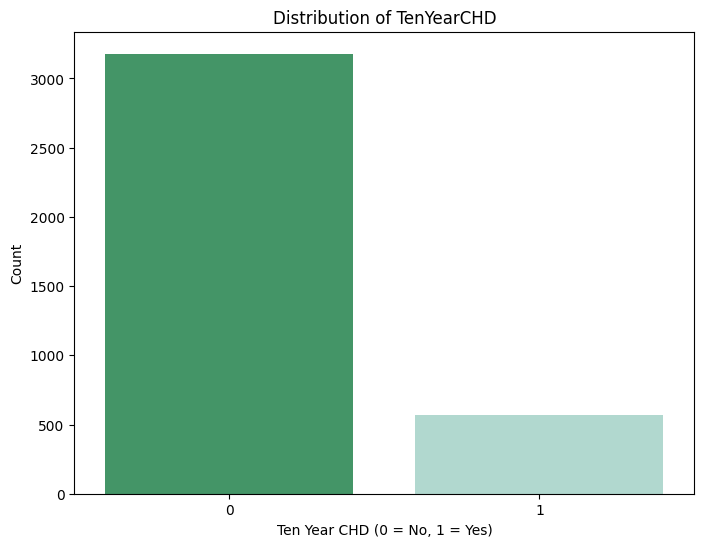

In [8]:
# plt.Figure(figsize=(8,6))

# sns.catplot(x='TenYearCHD' , data=df , palette='BuGn_r')

# plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='TenYearCHD', data=df, palette='BuGn_r')
plt.title('Distribution of TenYearCHD')
plt.xlabel('Ten Year CHD (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# logestic regression

In [9]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [10]:
y_pred=log.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
from sklearn.metrics import accuracy_score
print("acc : ", accuracy_score(y_test , y_pred))

acc :  0.8308921438082557


# confusion matrix

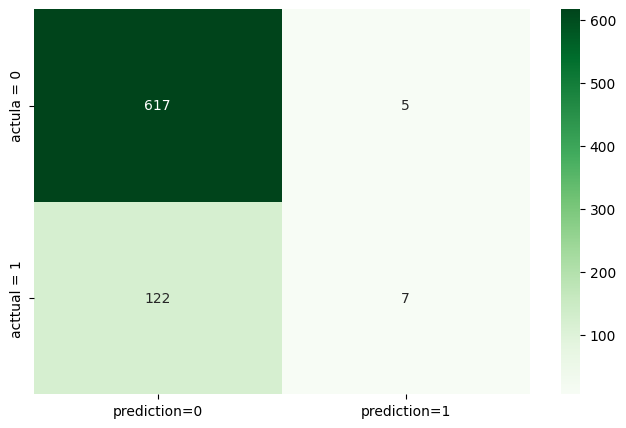

matrix : 
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       622
           1       0.58      0.05      0.10       129

    accuracy                           0.83       751
   macro avg       0.71      0.52      0.50       751
weighted avg       0.79      0.83      0.77       751



In [16]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test , y_pred)

conf_matrix = pd.DataFrame(data=cm , columns=["prediction=0" , "prediction=1"] , index=["actula = 0" , "acttual = 1"])

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix , annot= True , fmt='d' , cmap='Greens')
plt.show()

print("matrix : ")
print(classification_report(y_test , y_pred))

In [17]:
new_data_point = np.array([[5 , 1 , 10 , 200 , 120 , 80]])
scaler =preprocessing.StandardScaler().fit(x)
new_data_point_normalized = scaler.transform(new_data_point)
predict_outcome = log.predict(new_data_point_normalized)

if predict_outcome [0] == 1 :
    print("yes")
else :
    print("no")    

yes
